In [3]:
 
  
  #Converting the input to a PNG image.
'''  
Note : 
Converted to PNG
Trimmed
Resized
Sharpened
Extended
Negated
Gray-scaled'''



'  \nNote : \nConverted to PNG\nTrimmed\nResized\nSharpened\nExtended\nNegated\nGray-scaled'

In [4]:
#Importing libraries first to play with the dataset..
#Getting started with building our first neural nw...


import torch
import numpy as np
import torchvision as vision
import torchvision.transforms as transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)
print('Import done!!')



Import done!!


In [5]:
'''
We will be using the fashion-MNIST dataset that comes built-in with the torchvision package,
so we won’t have to do this for our project. Just know that the Fashion-MNIST built-in dataset class is doing this behind the scenes.
'''


#Torchvivion has the toy datatset for MNIST and FashionMNIST
'''
An abstract class is a Python class that has methods we must implement, so we can 
create a custom dataset by creating a subclass that extends the functionality of the
Dataset class.
To create a custom dataset using PyTorch, we extend the Dataset class by creating
a subclass that 
implements these required methods. Upon doing this, our new subclass can then 
be passed to the a PyTorch DataLoader object.

Fashion-MNIST dataset extends the Datset class internally . therefore available in torchvision package..

'''



#Creating a Train set

train_set = vision.datasets.FashionMNIST(
              root='./data/FashionMNIST',
              train = True , 
              download = True,
              transform = transforms.Compose([transforms.ToTensor()])
                )



print('Done loading the train set' , train_set)

0it [00:00, ?it/s]

26427392it [00:02, 12965816.16it/s]                             


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 102869.23it/s]           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4289058.92it/s]                            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 32008.82it/s]            

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
Done loading the train set Dataset FashionMNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/FashionMNIST
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None


In [6]:
print(train_set[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
      

In [0]:
#Loading The Data in a dataloader to acccess shuffling and batch params...
#A part of ETL (Extract Transform and Load...)
train_loader = torch.utils.data.DataLoader(train_set , batch_size=10)

In [0]:
#Analyzing the dataset...
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [18]:
#No. of training samples...

len(train_set)

60000

In [19]:
# No of labels in training set as Tensors...
train_set.train_labels


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [20]:
#bin_count() => gives the number of label appearing in the training set..
train_set.train_labels.bincount()


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [21]:
#Explanation of output 9 appeared 6000 times and so on..


#Itearating over the train_set through iter() which returns a tuple when called by next()


sample = next(iter(train_set))
print(len(sample) , type(sample))





2 <class 'tuple'>


In [22]:
print(sample[0][0])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000],
        [0.0000, 0.0000, 0.0

In [0]:
image , label = sample

In [24]:
print(image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
       

In [25]:
np.shape(image) , np.shape(label)

(torch.Size([1, 28, 28]), ())

In [26]:
image = torch.tensor(image , dtype = torch.int32)
label = torch.tensor(label , dtype = torch.int32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [27]:
image.shape , label.shape

(torch.Size([1, 28, 28]), torch.Size([]))

torch.Size([1, 28, 28])
label: tensor(9, dtype=torch.int32)


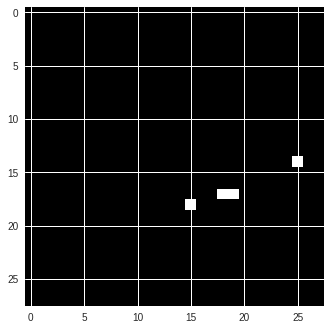

In [28]:

plt.imshow(image.squeeze() , cmap = 'gray')
print(image.shape)
print('label:' , label)

In [0]:
batch = next(iter(train_loader))

In [30]:
len(batch)

2

In [0]:
#Trying Iter function to iterate over a list
el = iter([(1,2) , (3,4)])


In [32]:
while True:
    try:
        # get the next item
        element = next(el)
        print(element)
        # do something with element
    except StopIteration:
        # if StopIteration is raised, break from loop
        break

(1, 2)
(3, 4)


In [33]:
batch[0]

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [34]:
len(batch[0])

10

In [0]:
images, labels = batch

In [36]:
images.shape , labels.shape

(torch.Size([10, 1, 28, 28]), torch.Size([10]))

(3, 32, 302)
(32, 3, 302)
labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


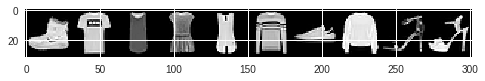

In [37]:
#Lets see what grid looks like..

grid = vision.utils.make_grid(images , nrow = 10 )
grid_numpy = grid.numpy()

print(grid_numpy.shape)

print(np.transpose(grid_numpy, (1, 0, 2)).shape)
tp = np.transpose(grid , (1,2,0))
plt.imshow(tp)
print('labels:' , labels)


In [0]:
#We create the neural networks by importing nn package

#Important things to remember
#1.Linear Transformations - Code
#2.Weights(Learnable params) - Data



#Rule 2:
'''
The tensor flows first through the forward pass from the 
layers reaching the output layer , this is known as feed-forward-network

#This is done by extending nn.Functional module.

#Take-way - Read the classes to understand it in a better sense.

'''

#A dummy network without extending nn.Module class.



class DummyNet:
  def __init__(self , layer):
    
    self.layer = None
    
  def forward(self, t):
    t = self.layer(t)
    return t
  
dumb_net = DummyNet(torch.rand((1,2)))
#print(dumb_net.forward())
  



In [39]:
#Lets implement a neural network which does some good ...

import torch.nn as nn


class Functional_Neural_Net(nn.Module):
  def __init__(self):
    #calling super constructor to keep the track of weights updated in the process(training..)
    print('==what===' , super(Functional_Neural_Net , self).__init__())
    self.conv1 = nn.Conv2d(in_channels=1 , out_channels=6 , kernel_size = 5)
    self.conv2 = nn.Conv2d(in_channels=6 , out_channels = 12 , kernel_size=5)
    #12*4*4 is basically flattening the output before feeding into Fully connected linear layer.
    
    self.fc1 = nn.Linear(12 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
Functional_Neural_Net()
    
    

==what=== None


Functional_Neural_Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [40]:
#The Updation of weights or parameters happens because of the Module class that inherits the Linear class in python....

#Note:- Please see the Module.py class and Linear.py for better understanding....

#Majorly there are two params

#HyperParameters
#Data Dependent Parameters


'''
Some cool things to remember before building our first NN

input_channels = One input channel (Gray scale image ) , alternatively can have 3 in_channels i.e RGB

kernel_size = Sets the number of filters with number of output channels.One filter produces one output channel

output_features = Number of output tensors



#Data dependent parameters = in_channels and out_channels

#outputs feature maps = until the network is fed into the fully connected layer  i.e 1 tensor form

'''


#12*4*4 comes from the formula [(inputSize + 2*pad - filterSize)/stride] + 1

#as we have 2 convolutions ,Therefore formulating as:-


# padding = 0 
#input_size =  (28*28)
#filterSize = 5

conv_first_layer = (28-5/1) + 1
conv_second_layer =(conv_first_layer - 5 )/1 + 1
print("Fully connected layer would have dimensions as :===" , conv_second_layer)


Fully connected layer would have dimensions as :=== 20.0


In [41]:
#therefore the fully connected layer would have 20*20 pixels if flattened , but as we will be applying max_pool2d layer to the onvolution therefore the 
#pixels size would reduce to 4*4
'''

deeplizard
Hey again AvZ - I like your question, and I'm glad you took a chance by asking it! You're logic is correct. 
The reason we are at 4x4 instead of 20x20 after conv2 is due to some details that haven't yet to be presented. 
In our forward method implementation, we will use some pooling operations that also reduce the dimensions.


It will be like this: 
The output of conv1 should be ((28-5) + 1) / 2 = 12x12 image
The output of conv2 should be ((12-5) + 1) / 2 = 4x4 image

Learnable Parameters = Which are learned during the training process i.e computing and minimizing the loss function

If we dont specify the super() thing in our code , we will get simply just the object and nothing else...

Module class (In a nutshell) :  The Module class contains Layers , therefore when we call the super constructor we refer to the Layer class which inded creates Layers.



'''

fNet = Functional_Neural_Net()

print(fNet)

==what=== None
Functional_Neural_Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [42]:
fNet.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [43]:
#our convolution layer contains weight object (lies in conv1 layer) 
fNet.conv1.weight


Parameter containing:
tensor([[[[-0.1985, -0.1159,  0.1639,  0.0378,  0.1709],
          [ 0.0689, -0.0647,  0.0894,  0.0132, -0.1996],
          [ 0.0918, -0.1420,  0.1636, -0.0206, -0.0385],
          [-0.1301,  0.0539, -0.1110,  0.1889, -0.1616],
          [-0.0236,  0.0883,  0.1814,  0.1380,  0.0432]]],


        [[[-0.1265,  0.1817, -0.0211,  0.0190, -0.0212],
          [ 0.1104, -0.1023,  0.1608,  0.0095, -0.0302],
          [ 0.1460, -0.1132, -0.0804,  0.1267, -0.1857],
          [-0.1280, -0.0782, -0.0367, -0.1502,  0.0398],
          [-0.1016,  0.1995, -0.0940, -0.1445, -0.0855]]],


        [[[-0.1658, -0.0253, -0.1938,  0.0210,  0.1190],
          [ 0.0305,  0.1550, -0.0147, -0.1948, -0.1619],
          [ 0.1175, -0.1711,  0.1211, -0.0705,  0.1882],
          [-0.0893, -0.0702, -0.1216, -0.1865, -0.1998],
          [ 0.1368,  0.1173,  0.1249, -0.1753,  0.1471]]],


        [[[ 0.1958, -0.0031, -0.1857,  0.0419, -0.0133],
          [-0.0532,  0.1794,  0.1948,  0.1104, -0.1156

In [45]:
#Parameter containing:

#Parameter extends torch.Tensor class , therefore weight extends Parameter class and when we specify .weight, it return the tensor as weight parameters...

fNet.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [46]:
#Result of the first outp[ut says that  we have 6 filters (feature maps) , 1 input_channel (Gray scale image) , kernel_size(5,5)


fNet.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [47]:
#The second results that we have 12 filters (coming from the first input channel , 6 => input channels which are returned from the output of first conv1 layer
fNet.fc1.weight.shape

torch.Size([120, 192])

In [48]:
#120 => parameters returned from conv 2 layer ,  filters = 192

fNet.parameters()

<generator object Module.parameters at 0x7f43b550eaf0>

In [0]:
for name,param in fNet.named_parameters():
  print(name + '\t' +str(param.shape))

In [0]:
#Training our first NN model...
print(train_set[0])

In [0]:
train_loader

In [0]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

from sklearn.model_selection import train_test_split

In [65]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fMnistConv1 = nn.Conv2d(in_channels = 1 , out_channels = 6 , kernel_size = 5)
    self.fMnistConv2 = nn.Conv2d(in_channels = 6 , out_channels = 12 , kernel_size = 5)

    #adding fully connected layers

    self.fc1 = nn.Linear(12*4*4 , 120)
    self.fc2 = nn.Linear(120 , 84)
    self.fc3 = nn.Linear(84 , 10)

  def forward(self,x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.fMnistConv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.fMnistConv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

  
  
mlp = MLP()
print(mlp)

MLP(
  (fMnistConv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (fMnistConv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
BATCH_SIZE = 10
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))
  '''Parameters :-
      conv1.weight	torch.Size([6, 1, 5, 5])
      conv1.bias	torch.Size([6])
      conv2.weight	torch.Size([12, 6, 5, 5])
      conv2.bias	torch.Size([12])
      fc1.weight	torch.Size([120, 192])
      fc1.bias	torch.Size([120])
      fc2.weight	torch.Size([84, 120])
      fc2.bias	torch.Size([84])
      fc3.weight	torch.Size([10, 84])
      fc3.bias	torch.Size([10])
  '''  
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            #print('====predicted' , predicted)
            correct += (predicted == var_y_batch).sum()
            #print('Correct' , correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))

In [84]:
fit(mlp, train_loader)

Epoch : 0 [0/60000 (0%)]	Loss: 0.376526	 Accuracy:90.000%
Epoch : 0 [500/60000 (1%)]	Loss: 1.451877	 Accuracy:90.392%
Epoch : 0 [1000/60000 (2%)]	Loss: 0.437374	 Accuracy:90.099%
Epoch : 0 [1500/60000 (2%)]	Loss: 0.111584	 Accuracy:89.404%
Epoch : 0 [2000/60000 (3%)]	Loss: 0.209597	 Accuracy:89.303%
Epoch : 0 [2500/60000 (4%)]	Loss: 0.564388	 Accuracy:89.163%
Epoch : 0 [3000/60000 (5%)]	Loss: 0.431075	 Accuracy:88.704%
Epoch : 0 [3500/60000 (6%)]	Loss: 0.592183	 Accuracy:88.718%
Epoch : 0 [4000/60000 (7%)]	Loss: 0.159937	 Accuracy:88.753%
Epoch : 0 [4500/60000 (8%)]	Loss: 0.861704	 Accuracy:88.714%
Epoch : 0 [5000/60000 (8%)]	Loss: 0.111815	 Accuracy:89.002%
Epoch : 0 [5500/60000 (9%)]	Loss: 0.558593	 Accuracy:88.657%
Epoch : 0 [6000/60000 (10%)]	Loss: 0.513477	 Accuracy:88.885%
Epoch : 0 [6500/60000 (11%)]	Loss: 0.435762	 Accuracy:88.986%
Epoch : 0 [7000/60000 (12%)]	Loss: 0.498353	 Accuracy:89.058%
Epoch : 0 [7500/60000 (12%)]	Loss: 0.395784	 Accuracy:89.068%
Epoch : 0 [8000/60000 (1

In [87]:
#Let's test our model on test set

test_set = vision.datasets.FashionMNIST(
              root='./data/FashionMNIST',
              train = False ,
              download = True,
              transform = transforms.Compose([transforms.ToTensor()])
                )

  
  
  

0it [00:00, ?it/s]

26427392it [00:01, 14828670.02it/s]                             


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 103386.53it/s]           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4370563.89it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 33167.79it/s]            

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [88]:
#We can see our test_set data now

test_set[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [0]:
#Loading the Test Set Data to DataLoader

test_loader = torch.utils.data.DataLoader(test_set , batch_size=10)
#Image will be of tensor size [10,1,28,28]

In [90]:
def evaluate_test(model):
#model = mlp
    correct = 0 
    for test_imgs, test_labels in test_loader:
        #print(test_imgs.shape)
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        correct += (predicted == test_labels).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*BATCH_SIZE)))
evaluate_test(mlp)

Test accuracy:0.882% 
